In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
full_data = pd.read_csv(r"C:\Users\Edwin\Desktop\OT2-DOE\PlanPrepareProcess\06_03_21_5CB_SDS_Abs")

wavelength_columns = [col for col in full_data.columns if 'nm' in col]
wavelengths = [float(wavelength.replace("nm","")) for wavelength in wavelength_columns]
full_spectra = full_data[wavelength_columns]

full_data

,UID,Labware,Slot,Well,5CB concentration wtf,SDS concentration wtf,ethanol concentration wtf,water concentration wtf,5CB amount mass g,5CB amount volume uL,...,710.0nm,720.0nm,730.0nm,740.0nm,750.0nm,760.0nm,770.0nm,780.0nm,790.0nm,800.0nm
0,S2_A1_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A1,0.000,0.0000,0.1,0.9000,0.00000,0.000000,...,0.041,0.043,0.045,0.048,0.049,0.049,0.049,0.049,0.049,0.048
1,S2_A2_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A2,0.000,0.0000,0.2,0.8000,0.00000,0.000000,...,0.041,0.042,0.044,0.046,0.047,0.047,0.047,0.047,0.047,0.046
2,S2_A3_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A3,0.000,0.0000,0.3,0.7000,0.00000,0.000000,...,0.039,0.040,0.041,0.043,0.043,0.044,0.044,0.043,0.043,0.043
3,S2_A4_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A4,0.000,0.0000,0.4,0.6000,0.00000,0.000000,...,0.038,0.038,0.038,0.038,0.038,0.038,0.038,0.037,0.037,0.037
4,S2_A5_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,A5,0.000,0.0000,0.5,0.5000,0.00000,0.000000,...,0.040,0.041,0.042,0.044,0.043,0.044,0.043,0.043,0.043,0.043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,S5_A5_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,A5,0.001,0.0005,0.4,0.5985,0.00065,0.643564,...,0.038,0.039,0.039,0.040,0.040,0.039,0.039,0.039,0.039,0.039
101,S5_A6_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,A6,0.001,0.0005,0.5,0.4985,0.00065,0.643564,...,0.040,0.040,0.042,0.044,0.044,0.044,0.044,0.043,0.043,0.043
102,S5_A7_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,A7,0.001,0.0005,0.6,0.3985,0.00065,0.643564,...,0.042,0.042,0.043,0.045,0.045,0.045,0.045,0.044,0.044,0.044
103,S5_A8_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,A8,0.001,0.0005,0.7,0.2985,0.00065,0.643564,...,0.042,0.043,0.044,0.046,0.046,0.046,0.046,0.046,0.046,0.046


In [103]:
cb_0 = full_data[full_data['5CB concentration wtf'] == 0]
blanks = cb_0[cb_0['SDS concentration wtf'] == 0].copy()
samples = full_data[8:].copy()
blanked_samples = samples.copy()

In [100]:
samples_etoh = samples.groupby('ethanol concentration wtf')
blanks_etoh = blanks.groupby('ethanol concentration wtf')

In [111]:
blanked_spectras_list = []
for etoh, group in samples_etoh:
    single_etoh_samples = group
    single_etoh_spectras = single_etoh_samples[wavelength_columns]
    blank_sample = blanks[blanks['ethanol concentration wtf']==etoh]
    blank_spectra = blank_sample[wavelength_columns]

    blanked_spectras = single_etoh_spectras-blank_spectra.values
    blanked_spectras_list.append(blanked_spectras)

In [112]:
pd.concat(blanked_spectras_list,axis=0)

,300.0nm,310.0nm,320.0nm,330.0nm,340.0nm,350.0nm,360.0nm,370.0nm,380.0nm,390.0nm,...,710.0nm,720.0nm,730.0nm,740.0nm,750.0nm,760.0nm,770.0nm,780.0nm,790.0nm,800.0nm
8,2.682,2.705,2.694,2.493,2.368,2.285,2.217,2.160,2.109,2.063,...,1.020,0.990,0.961,0.932,0.905,0.878,0.853,0.827,0.803,0.780
16,2.979,2.994,2.989,2.902,2.757,2.671,2.607,2.554,2.504,2.462,...,1.824,1.800,1.777,1.753,1.727,1.702,1.677,1.650,1.623,1.595
38,0.006,0.004,0.004,0.003,0.003,0.003,0.003,0.002,0.002,0.001,...,0.000,-0.001,-0.001,-0.002,-0.003,-0.003,-0.003,-0.003,-0.004,-0.004
9,0.576,0.482,0.430,0.419,0.423,0.426,0.429,0.429,0.431,0.430,...,0.334,0.329,0.323,0.318,0.312,0.308,0.304,0.300,0.296,0.293
17,0.722,0.567,0.483,0.460,0.455,0.456,0.460,0.461,0.462,0.462,...,0.382,0.374,0.369,0.364,0.360,0.357,0.354,0.351,0.348,0.344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,-0.027,-0.016,-0.011,-0.007,-0.003,-0.001,-0.002,-0.002,-0.001,0.000,...,-0.003,-0.004,-0.004,-0.004,-0.003,-0.003,-0.003,-0.004,-0.004,-0.004
86,1.994,1.077,0.078,-0.009,-0.005,-0.003,-0.003,-0.002,-0.001,-0.001,...,-0.003,-0.004,-0.004,-0.004,-0.003,-0.003,-0.003,-0.003,-0.003,-0.004
92,2.042,1.782,0.178,0.000,0.000,0.000,0.000,0.000,0.001,0.001,...,-0.002,-0.003,-0.003,-0.003,-0.002,-0.002,-0.002,-0.003,-0.003,-0.003
98,2.086,2.042,0.268,0.019,0.015,0.015,0.013,0.013,0.013,0.013,...,0.002,0.001,0.001,0.001,0.002,0.002,0.002,0.001,0.001,0.000


In [119]:
blanked_samples[wavelength_columns] = pd.concat(blanked_spectras_list,axis=0)
blanked_samples.to_csv('06_03_21_5CB_SDS_Blanked', index=False)

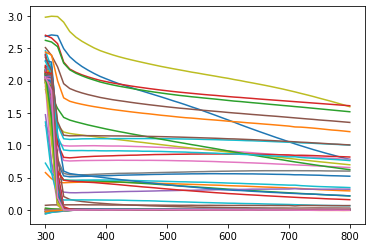

In [117]:
spectras = blanked_samples[wavelength_columns]
for i, spec in spectras.iterrows():
    spec = list(spec)
    plt.plot(wavelengths, spec)